In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torchvision.datasets as datasets


data_dir = './dataset'
transform_pipeline = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.1307], std=[0.3081]),
    T.Resize((32, 32))
])


train_dataset = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform_pipeline)
test_dataset = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform_pipeline)

def load_datasets(batch_size_train, batch_size_test):
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size_train, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size_test, shuffle=False)
    return train_loader, test_loader

class ConvNetSimple(nn.Module):
    def __init__(self):
        super(ConvNetSimple, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(8, 32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_block = nn.Sequential(
            nn.Linear(32 * 5 * 5, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = x.view(x.size(0), -1)
        x = self.fc_block(x)
        return x

class ConvNetAdvanced(nn.Module):
    def __init__(self):
        super(ConvNetAdvanced, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_block = nn.Sequential(
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = x.view(x.size(0), -1)
        x = self.fc_block(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")


train_loader, test_loader = load_datasets(64, 1000)


network1 = ConvNetSimple().to(device)
optimizer1 = optim.Adam(network1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

network2 = ConvNetAdvanced().to(device)
optimizer2 = optim.Adam(network2.parameters(), lr=0.001)

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 45244250.83it/s]


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 946675.84it/s]


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 11928125.53it/s]


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



100%|█████████████████████████████████| 4542/4542 [00:00<00:00, 48722579.97it/s]


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw

Using cuda


/home/mshujaa/miniconda3/envs/spyder-env/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1, Loss: 0.1625, Accuracy: 95.17%
Epoch 2, Loss: 0.0481, Accuracy: 98.55%
Epoch 3, Loss: 0.0350, Accuracy: 98.90%
Epoch 4, Loss: 0.0261, Accuracy: 99.14%
Epoch 5, Loss: 0.0204, Accuracy: 99.36%
Epoch 6, Loss: 0.0166, Accuracy: 99.47%
Epoch 7, Loss: 0.0140, Accuracy: 99.54%
Epoch 8, Loss: 0.0131, Accuracy: 99.55%
Epoch 9, Loss: 0.0115, Accuracy: 99.60%
Epoch 10, Loss: 0.0095, Accuracy: 99.68%
Epoch 1, Loss: 0.1789, Accuracy: 94.50%
Epoch 2, Loss: 0.0820, Accuracy: 97.52%
Epoch 3, Loss: 0.0639, Accuracy: 98.06%
Epoch 4, Loss: 0.0526, Accuracy: 98.37%
Epoch 5, Loss: 0.0446, Accuracy: 98.62%
Epoch 6, Loss: 0.0383, Accuracy: 98.80%
Epoch 7, Loss: 0.0336, Accuracy: 98.94%
Epoch 8, Loss: 0.0288, Accuracy: 99.07%
Epoch 9, Loss: 0.0252, Accuracy: 99.20%
Epoch 10, Loss: 0.0219, Accuracy: 99.29%


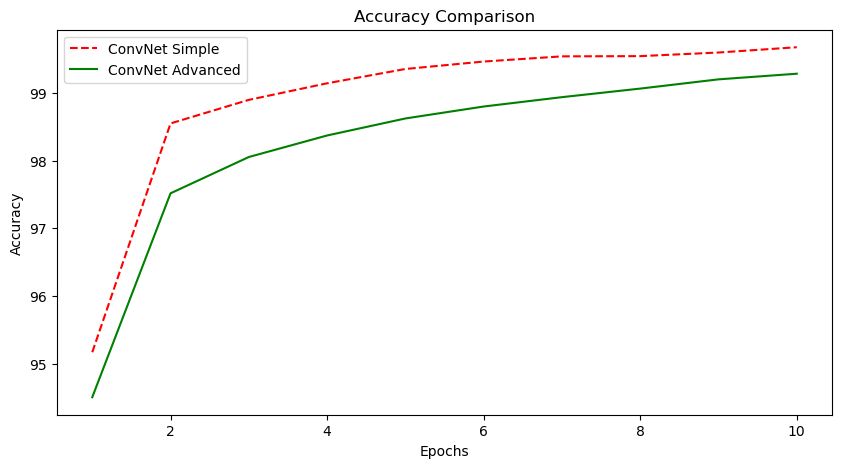

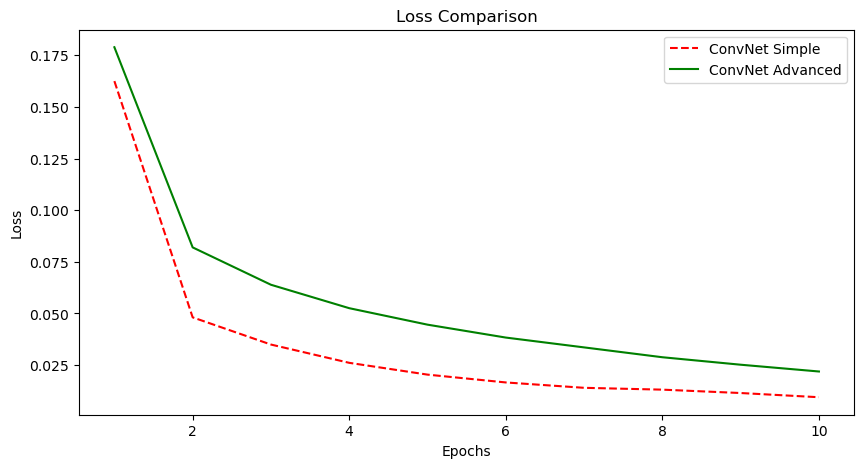

In [2]:
def execute_training(network, criterion, epochs, train_loader, optimizer, device):
    network.train()  # Set the network to training mode
    epoch_losses = []
    epoch_accuracies = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for data, targets in train_loader:
            data, targets = data.to(device), targets.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = network(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        epoch_loss = total_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    return epoch_losses, epoch_accuracies


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network1.to(device)
network2.to(device)
losses1, accuracies1 = execute_training(network1, criterion, 10, train_loader, optimizer1, device)
losses2, accuracies2 = execute_training(network2, criterion, 10, train_loader, optimizer2, device)


def plot_metrics(metrics1, metrics2, metric_name):
    epochs = range(1, len(metrics1) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, metrics1, 'r--', label='ConvNet Simple')
    plt.plot(epochs, metrics2, 'g-', label='ConvNet Advanced')
    plt.title(f'{metric_name} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()


plot_metrics(accuracies1, accuracies2, "Accuracy")
plot_metrics(losses1, losses2, "Loss")